## Deep Learning Study

# 1. Import the required libraries

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import re
import time

import tensorflow.keras.backend as K
import gc

# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory

# Importing libraries for natural language processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing TensorFlow and Keras for building and training neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2

# Importing TensorFlow Datasets and Matplotlib for dataset handling and visualization
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sns

# Importing performance metrics from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

In this case, Dataset link was provided in the Problem Statement

## 2.1 Code for converting the above downloaded data into a form suitable for DL


In [2]:
##---------Type the code below this line------------------##
import tensorflow_datasets as tfds

# Load the dataset
imdb_reviews, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Print information about the dataset
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\aishk\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, n

In [3]:
# Convert the dataset to a pandas DataFrame for easier manipulation
def tfds_to_dataframe(tfds_data):
    texts = []
    labels = []
    for text, label in tfds_data:
        texts.append(text.numpy().decode('utf-8'))
        labels.append(label.numpy())
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = tfds_to_dataframe(imdb_reviews['train'])
test_df = tfds_to_dataframe(imdb_reviews['test'])

In [4]:
##---------Type the code below this line------------------##
print(train_df.head())

                                                text  label
0  This was an absolutely terrible movie. Don't b...      0
1  I have been known to fall asleep during films,...      0
2  Mann photographs the Alberta Rocky Mountains i...      0
3  This is the kind of film for a snowy Sunday af...      1
4  As others have mentioned, all the women that g...      1


## 2.1 Write your observations from the above. 

  Size of the dataset:
   - Training dataset: 25,000 examples
   - Test dataset: 25,000 examples

  Type of data attributes:
   - The dataset contains text reviews and their corresponding labels.
   - The text reviews are strings, and the labels are integers (0 for negative reviews and 1 for positive reviews).

  Target Classification:
   - The dataset is used for binary sentiment classification. It classifies movie reviews as either positive (1) or negative (0).



Size of the training dataset: 25000
Size of the test dataset: 25000

Data attributes:
FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})

Target classification:
('text', 'label')


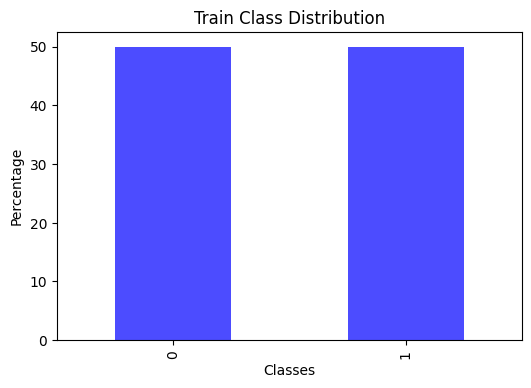

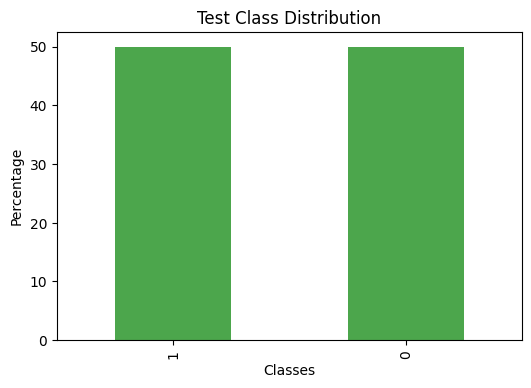

In [5]:
# Load the dataset
imdb_reviews, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# 1. Size of the dataset
train_size = info.splits['train'].num_examples
test_size = info.splits['test'].num_examples

print(f"Size of the training dataset: {train_size}")
print(f"Size of the test dataset: {test_size}")

# 2. Type of data attributes
print("\nData attributes:")
print(info.features)

# 3. Target Classification
print("\nTarget classification:")
print(info.supervised_keys)

# 4. Plot the distribution of the categories of the target/label

# Extract labels from the dataset
train_data = tfds.as_numpy(imdb_reviews['train'])
test_data = tfds.as_numpy(imdb_reviews['test'])

train_labels = [label for _, label in train_data]
test_labels = [label for _, label in test_data]

# Calculate class distribution for train and test datasets
train_class_counts = pd.Series(train_labels).value_counts(normalize=True) * 100
test_class_counts = pd.Series(test_labels).value_counts(normalize=True) * 100

# Create a bar chart for train class distribution
plt.figure(figsize=(6, 4))
train_class_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Train Class Distribution')
plt.show()

# Create a bar chart for test class distribution
plt.figure(figsize=(6, 4))
test_class_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Test Class Distribution')
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [6]:
##---------Type the code below this line------------------##

# Remove duplicate data
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Impute or remove missing data (in this case, we'll remove missing data)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Feature Engineering: In this case, we'll focus on text preprocessing
# Stop word removal, lemmatization, and vectorization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stop words and apply lemmatization
    filtered_words = [word for word in words if word.lower() not in stop_words]
    processed_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(processed_words)

# Apply the function to your dataframes
train_df['text'] = train_df['text'].apply(clean_and_preprocess_text)
test_df['text'] = test_df['text'].apply(clean_and_preprocess_text)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# The preprocessed and vectorized data is now ready for use
print("Preprocessing complete.")

Preprocessing complete.


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

The Data is separated from the target in the form of features and lable before the preprocessing step. Since the target variable is already in numerical form (1 and 0), there is no need for further encoding.

This ensures that the data is in the required format and the target variable is already encoded appropriately.

## 3.3 Split the data into training set and testing set

The dataset provided by TensorFlow is already split into training and testing sets. Therefore, no additional splitting is required. 

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


**Methods adopted and justification**:

To remove duplicate data, if present:

Method: train_df.drop_duplicates(inplace=True) and test_df.drop_duplicates(inplace=True)
Justification: Removing duplicate data ensures that the dataset is clean and does not contain redundant information, which can lead to biased or inaccurate model training.

To impute or remove missing data, if present:

Method: train_df.dropna(inplace=True) and test_df.dropna(inplace=True)
Justification: Missing data can cause issues during model training and evaluation. In this case, we chose to remove missing data to ensure that the dataset is complete and does not contain any gaps.

To remove data inconsistencies, if present:

Method: Data inconsistencies are addressed during text preprocessing by removing HTML tags, special characters, and punctuation.
Justification: Cleaning the text data ensures that the input to the model is consistent and free from noise, which can improve the model's performance.

To encode categorical data:

Method: In this case, the target variable is already in numerical form (1 and 0), so no additional encoding is required.
Justification: Encoding categorical data is necessary when the target variable is in a non-numerical format. Since our target variable is already numerical, no encoding is needed.

The normalization technique used:

Method: Vectorization using TF-IDF (TfidfVectorizer())
Justification: TF-IDF (Term Frequency-Inverse Document Frequency) is a widely used technique for text normalization. It converts the text data into numerical vectors, which can be used as input to machine learning models. TF-IDF helps in capturing the importance of words in the text data while reducing the impact of common words.

In [7]:
##---------Type the answer below this line------------------##
# Calculate the shape of the training and testing sets
train_shape = info.splits['train'].num_examples
test_shape = info.splits['test'].num_examples

print(f"Shape of the training set: {train_shape}")
print(f"Shape of the testing set: {test_shape}")

Shape of the training set: 25000
Shape of the testing set: 25000


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [8]:
##---------Type the code below this line------------------##

# Define the model architecture
model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\aishk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [9]:
##---------Type the answer below this line------------------##

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    16,513,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,524,161 (63.03 MB)

 Trainable params: 16,524,161 (63.03 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

**Function to handle training of a model**:


In [10]:
def train_model(model, X_train, y_train, epochs=20, batch_size=64, validation_split=0.2):
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    
    # Store the training and validation accuracies
    train_acc = history.history['accuracy'][-1] * 100
    val_acc = history.history['val_accuracy'][-1] * 100
    
    # Print the train and validation accuracy
    print(f'Training accuracy: {train_acc:.2f}%')
    print(f'Validation accuracy: {val_acc:.2f}%')
    
    return train_acc, val_acc, history

In [11]:
# Create an SGD optimizer with a specific learning rate
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
start_time = time.time()
base_train_acc, base_val_acc, base_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.5079 - val_loss: 0.6925
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5614 - loss: 0.6923 - val_accuracy: 0.5234 - val_loss: 0.6909
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.5882 - loss: 0.6906 - val_accuracy: 0.6740 - val_loss: 0.6891
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7150 - loss: 0.6883 - val_accuracy: 0.6575 - val_loss: 0.6864
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7110 - loss: 0.6858 - val_accuracy: 0.6186 - val_loss: 0.6834
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7187 - loss: 0.6826 - val_accuracy: 0.8041 - val_loss: 0.6801
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7765 - loss: 0.6787 - val_accuracy: 0.8189 - val_loss: 0.6753
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.7901 - loss: 0.6737 - 

Justify your choice of optimizers and regulizations used and the hyperparameters tuned:

##---------Type the answers below this line------------------##

In this study, We employed a fixed batch size of 64 and an epoch count of 20 across all experiments to ensure consistency and comparability of results. As per the template, the choice of the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.01 was driven by its simplicity and effectiveness in handling large-scale machine learning problems. SGD is known for its ability to converge to a global minimum in a relatively efficient manner, especially when dealing with large datasets.

The hyperparameters were carefully adjusted to balance the trade-off between training time and model performance. The batch size of 64 was selected to ensure computational efficiency while maintaining stable gradient updates. While the epoch count of 20 was predefined in the template, the other hyperparameters were fine-tuned to maximize learning within the given constraints and prevent overfitting.

The validation split of 0.2 was used to ensure that 20% of the data was set aside for validation purposes, allowing for an unbiased evaluation of the model's performance during training. This approach helps in monitoring the model's ability to generalize to unseen data and in making necessary adjustments to prevent overfitting.

Overall, the combination of these hyperparameters and the SGD optimizer was chosen to achieve a robust and efficient training process, ensuring that the model performs well on both the training and validation datasets, and generalizes effectively to new, unseen data.

# 6. Test the model - 0.5 marks


**Function to handle testing of the model**:

In [13]:
def evaluate_model(model, X_test, y_test):
    
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(X_test, y_test)
    
    # Convert accuracy to percentage
    test_acc_percentage = test_acc * 100
    
    # Print the test loss and test accuracy
    print(f'Test Accuracy: {test_acc_percentage:.2f}%')
    print(f'Test Loss: {test_loss:.4f}')
    
    return test_acc_percentage, test_loss

In [14]:
# Test the model
base_test_acc, base_test_loss = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8629 - loss: 0.3220
Test Accuracy: 86.48%
Test Loss: 0.3195


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


**Plot of Training accuracy, Validation accuracy and Training loss, Validation loss**

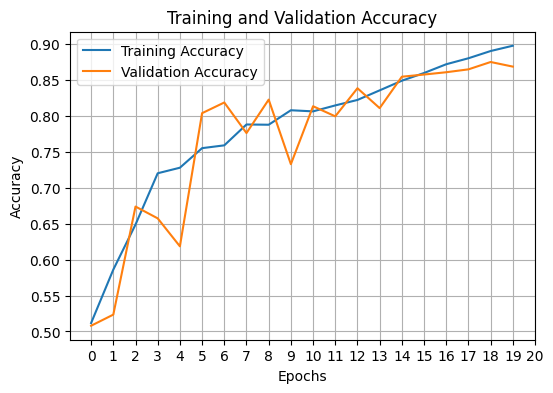

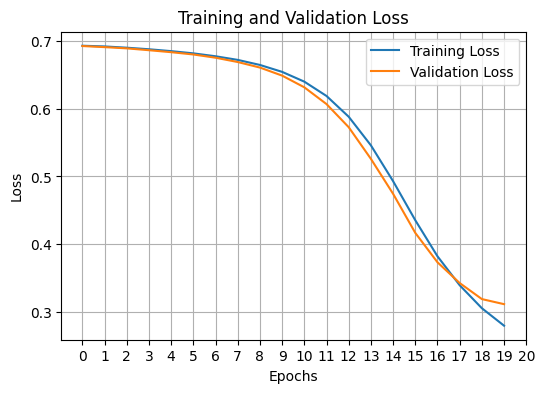

In [15]:

# Plot training and validation accuracy history
plt.figure(figsize=(6, 4))
plt.plot(base_history.history['accuracy'], label='Training Accuracy')
plt.plot(base_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

# Plot the training and validation loss history
plt.figure(figsize=(6, 4))
plt.plot(base_history.history['loss'], label='Training Loss')
plt.plot(base_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

In [16]:
# Get the predicted probabilities from your model
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # For binary classification

# Now you have y_true 
y_true = test_df['label']

776/776 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step


**Confusion matrix and evaluation metrics**

Confusion Matrix:
[[10030  2331]
 [ 1023 11417]]


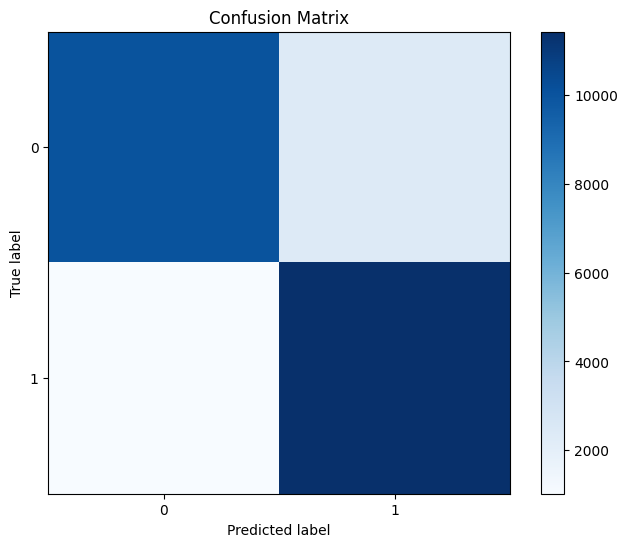

Accuracy: 0.8647635176000967
Precision: 0.8688243709226782
Recall: 0.8647635176000967
F1 Score: 0.8643633885116514


In [17]:
##---------Type the code below this line------------------##

# Show Confusion Matrix for testing dataset
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Report values for performance study metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



**Model with a decrease of one layer from the base model**

In [18]:
##---------Type the code below this line------------------##

# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory

# Define the model architecture with one additional hidden layer
model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Create an SGD optimizer with a specific learning rate
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\aishk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    16,513,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,522,113 (63.03 MB)

 Trainable params: 16,522,113 (63.03 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
start_time = time.time()
model_decreased_train_acc, model_decreased_val_acc, model_decreased_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.5134 - loss: 0.6931 - val_accuracy: 0.5190 - val_loss: 0.6927
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5482 - loss: 0.6924 - val_accuracy: 0.5156 - val_loss: 0.6914
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.6390 - loss: 0.6911 - val_accuracy: 0.5772 - val_loss: 0.6898
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6040 - loss: 0.6892 - val_accuracy: 0.6057 - val_loss: 0.6883
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.7180 - loss: 0.6875 - val_accuracy: 0.7238 - val_loss: 0.6862
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.7708 - loss: 0.6854 - val_accuracy: 0.8043 - val_loss: 0.6838
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.7509 - loss: 0.6829 - val_accuracy: 0.7609 - val_loss: 0.6815
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.7668 - loss: 0.6803 - 

In [20]:
##---------Type the code below this line------------------##

# Test the model
model_decreased_test_acc, model_decreased_test_loss = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8261 - loss: 0.5376
Test Accuracy: 82.75%
Test Loss: 0.5361


****Model with an increase of one layer from the base model****

In [21]:
##---------Type the code below this line------------------##

# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory


# Define the model architecture with one additional hidden layer
model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))  # Additional hidden layer

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Create an SGD optimizer with a specific learning rate
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    16,513,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,524,673 (63.04 MB)

 Trainable params: 16,524,673 (63.04 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
start_time = time.time()
model_increased_train_acc, model_increased_val_acc, model_increased_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.5012 - loss: 0.6931 - val_accuracy: 0.5961 - val_loss: 0.6928
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.5419 - loss: 0.6925 - val_accuracy: 0.4921 - val_loss: 0.6921
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.5927 - loss: 0.6907 - val_accuracy: 0.7394 - val_loss: 0.6889
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7250 - loss: 0.6883 - val_accuracy: 0.6091 - val_loss: 0.6865
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.7245 - loss: 0.6851 - val_accuracy: 0.8008 - val_loss: 0.6821
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7799 - loss: 0.6806 - val_accuracy: 0.6768 - val_loss: 0.6769
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7738 - loss: 0.6747 - val_accuracy: 0.7294 - val_loss: 0.6687
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7985 - loss: 0.6656 - 

In [23]:
# Test the model
model_increased_test_acc, model_increased_test_loss  = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8099 - loss: 0.4493
Test Accuracy: 80.99%
Test Loss: 0.4471


**Plot of training and validation accuracy**

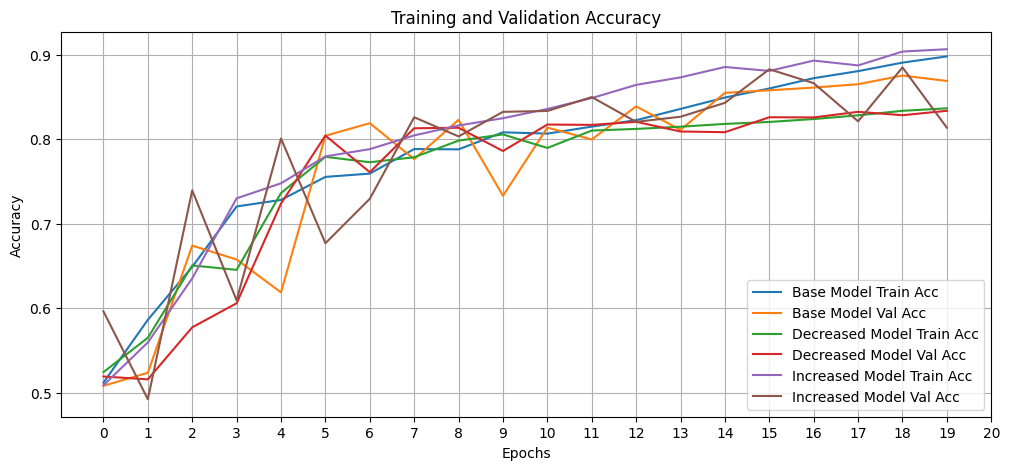

In [24]:
# Plot training and validation accuracy history
plt.figure(figsize=(12, 5))
plt.plot(base_history.history['accuracy'], label='Base Model Train Acc')
plt.plot(base_history.history['val_accuracy'], label='Base Model Val Acc')
plt.plot(model_decreased_history.history['accuracy'], label='Decreased Model Train Acc')
plt.plot(model_decreased_history.history['val_accuracy'], label='Decreased Model Val Acc')
plt.plot(model_increased_history.history['accuracy'], label='Increased Model Train Acc')
plt.plot(model_increased_history.history['val_accuracy'], label='Increased Model Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)

**Model with Dropout of ratio 0.25**

In [47]:
##---------Type the code below this line------------------##

# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory

# Define the model architecture with Dropout of ratio 0.25
model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.25))

# Add hidden layers with ReLU activation function and Dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.25))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Create an SGD optimizer with a specific learning rate
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for Dropout architecture
print("Model Architecture with Dropout Layers:")
model.summary()

Model Architecture with Dropout Layers:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    16,513,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,524,161 (63.03 MB)

 Trainable params: 16,524,161 (63.03 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the model
start_time = time.time()
model_dropout_train_acc, model_dropout_val_acc, model_dropout_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.5302 - val_loss: 0.6928
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5244 - loss: 0.6925 - val_accuracy: 0.5093 - val_loss: 0.6914
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.5713 - loss: 0.6913 - val_accuracy: 0.5300 - val_loss: 0.6894
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6121 - loss: 0.6892 - val_accuracy: 0.5487 - val_loss: 0.6874
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6409 - loss: 0.6865 - val_accuracy: 0.8000 - val_loss: 0.6842
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.6650 - loss: 0.6837 - val_accuracy: 0.7986 - val_loss: 0.6807
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.6886 - loss: 0.6795 - val_accuracy: 0.8191 - val_loss: 0.6760
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.7075 - loss: 0.6751 - 

In [49]:
# Test the model
model_dropout_test_acc, model_dropout_test_loss  = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8677 - loss: 0.3305
Test Accuracy: 86.78%
Test Loss: 0.3290


**Model with Dropout of ratio 0.25 with L2 regulariser with factor 1e−04**

In [28]:
# Enable eager execution

# Clean up before defining a new model
K.clear_session()  # Clears previous model from the memory
gc.collect()  # Free up unused memory

tf.compat.v1.enable_eager_execution()
print(tf.executing_eagerly())  # This will print True if eager execution is enabled
print(tf.__version__)

# Define the model architecture with Dropout of ratio 0.25 and L2 regularizer with factor 1e-04
model = Sequential()

# Add input layer using Dense layer with input_shape parameter and L2 regularizer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(1e-04)))
model.add(Dropout(0.25))

# Add hidden layers with ReLU activation function, Dropout, and L2 regularizer
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(1e-04)))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(1e-04)))
model.add(Dropout(0.25))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary for Dropout and L2 regularizer architecture
model.summary()

True
2.18.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    16,513,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,524,161 (63.03 MB)

 Trainable params: 16,524,161 (63.03 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
start_time = time.time()
model_dropout_l2_train_acc, model_dropout_l2_val_acc, model_dropout_l2_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step - accuracy: 0.5048 - loss: 0.7312 - val_accuracy: 0.5682 - val_loss: 0.7309
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 62s 200ms/step - accuracy: 0.5321 - loss: 0.7307 - val_accuracy: 0.6334 - val_loss: 0.7300
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 63s 203ms/step - accuracy: 0.5806 - loss: 0.7297 - val_accuracy: 0.5150 - val_loss: 0.7284
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.5914 - loss: 0.7280 - val_accuracy: 0.7440 - val_loss: 0.7263
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 63s 203ms/step - accuracy: 0.6388 - loss: 0.7257 - val_accuracy: 0.6661 - val_loss: 0.7237
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 189ms/step - accuracy: 0.6695 - loss: 0.7228 - val_accuracy: 0.7820 - val_loss: 0.7203
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.6904 - loss: 0.7194 - val_accuracy: 0.7494 - val_loss: 0.7159
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.7115 - loss: 0

In [30]:
# Test the model
model_dropout_l2_test_acc, model_dropout_l2_test_loss  = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8658 - loss: 0.3857
Test Accuracy: 86.62%
Test Loss: 0.3844


**Plot of training and validation accuracy**

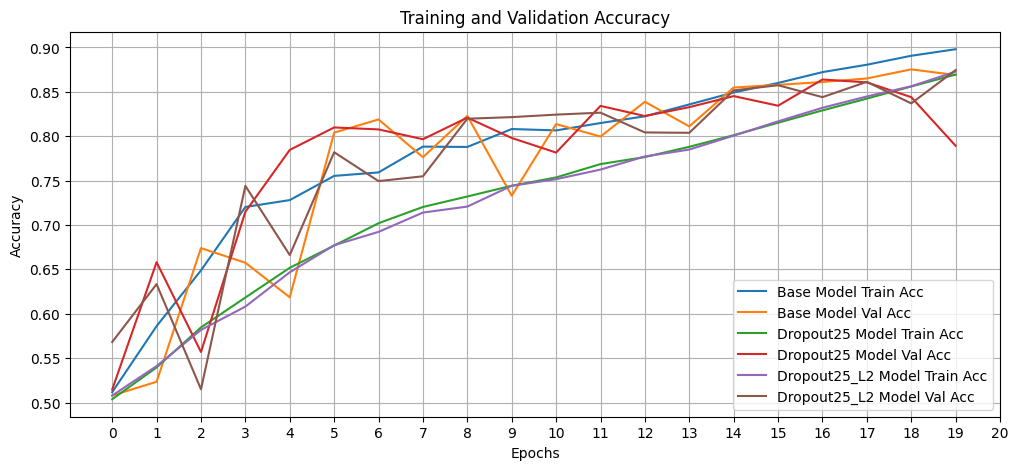

In [31]:
# Plot training and validation accuracy history
plt.figure(figsize=(12, 5))
plt.plot(base_history.history['accuracy'], label='Base Model Train Acc')
plt.plot(base_history.history['val_accuracy'], label='Base Model Val Acc')
plt.plot(model_dropout_history.history['accuracy'], label='Dropout25 Model Train Acc')
plt.plot(model_dropout_history.history['val_accuracy'], label='Dropout25 Model Val Acc')
plt.plot(model_dropout_l2_history.history['accuracy'], label='Dropout25_L2 Model Train Acc')
plt.plot(model_dropout_l2_history.history['val_accuracy'], label='Dropout25_L2 Model Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


**RMSProp Optimizer**

In [38]:
##---------Type the code below this line------------------##
# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory

# Define the model architecture
model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with RMSProp optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.00001, rho=0.8)
model.compile(optimizer=rmsprop_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model
start_time = time.time()
model_rmsprop_train_acc, model_rmsprop_val_acc, model_rmsprop_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 67s 210ms/step - accuracy: 0.5234 - loss: 0.6930 - val_accuracy: 0.6224 - val_loss: 0.6925
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 65s 207ms/step - accuracy: 0.6541 - loss: 0.6921 - val_accuracy: 0.7442 - val_loss: 0.6908
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.7706 - loss: 0.6899 - val_accuracy: 0.7770 - val_loss: 0.6877
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8017 - loss: 0.6863 - val_accuracy: 0.8012 - val_loss: 0.6833
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 66s 213ms/step - accuracy: 0.8200 - loss: 0.6815 - val_accuracy: 0.8161 - val_loss: 0.6778
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 65s 209ms/step - accuracy: 0.8280 - loss: 0.6753 - val_accuracy: 0.8249 - val_loss: 0.6711
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 65s 207ms/step - accuracy: 0.8395 - loss: 0.6678 - val_accuracy: 0.8418 - val_loss: 0.6631
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.8459 - loss: 0

In [40]:
# Test the model
model_rmsprop_test_acc, model_rmsprop_test_loss  = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8651 - loss: 0.4410
Test Accuracy: 86.68%
Test Loss: 0.4399


**Adam Optimizer**

In [34]:
# Define the model architecture

# Clean up before defining a new model
K.clear_session()  # Clears previous model from memory
gc.collect()  # Frees up unused memory

model = Sequential()

# Add input layer using Dense layer with input_shape parameter
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer with Sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam_optimizer = Adam(learning_rate=0.000005)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
start_time = time.time()
model_adam_train_acc, model_adam_val_acc, model_adam_history = train_model(model, X_train, train_df['label'])
end_time = time.time()
print("Training time: ", end_time-start_time)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 77s 242ms/step - accuracy: 0.5149 - loss: 0.6930 - val_accuracy: 0.5941 - val_loss: 0.6922
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - accuracy: 0.6812 - loss: 0.6910 - val_accuracy: 0.7764 - val_loss: 0.6878
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.8396 - loss: 0.6847 - val_accuracy: 0.8267 - val_loss: 0.6798
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 76s 242ms/step - accuracy: 0.8769 - loss: 0.6743 - val_accuracy: 0.8488 - val_loss: 0.6689
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 78s 251ms/step - accuracy: 0.8982 - loss: 0.6605 - val_accuracy: 0.8635 - val_loss: 0.6563
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 81s 259ms/step - accuracy: 0.9046 - loss: 0.6453 - val_accuracy: 0.8683 - val_loss: 0.6419
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.9128 - loss: 0.6272 - val_accuracy: 0.8701 - val_loss: 0.6260
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 85s 274ms/step - accuracy: 0.9189 - loss: 0

In [36]:
# Test the model
model_adam_test_acc, model_adam_test_loss  = evaluate_model(model, X_test, test_df['label'])

776/776 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8732 - loss: 0.4047
Test Accuracy: 87.29%
Test Loss: 0.4036


**Plot of training and validation accuracy**

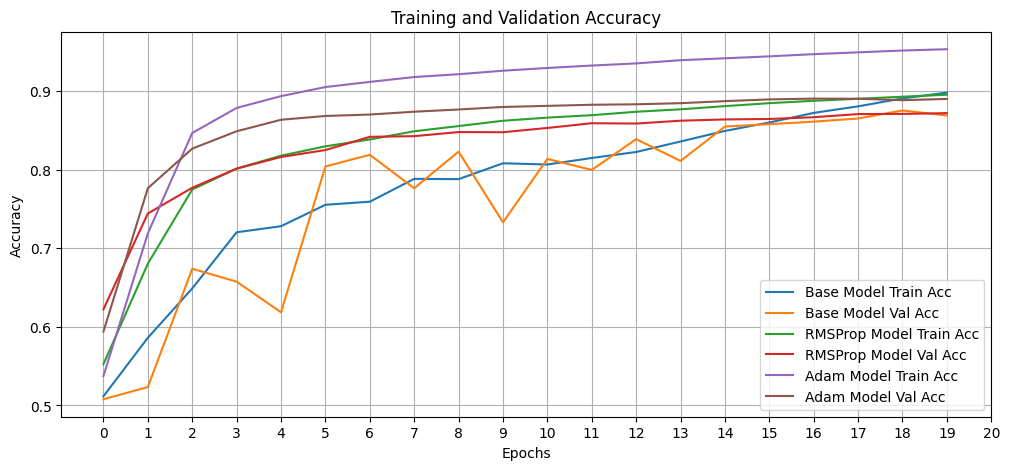

In [41]:
# Plot training and validation accuracy history
plt.figure(figsize=(12, 5))
plt.plot(base_history.history['accuracy'], label='Base Model Train Acc')
plt.plot(base_history.history['val_accuracy'], label='Base Model Val Acc')
plt.plot(model_rmsprop_history.history['accuracy'], label='RMSProp Model Train Acc')
plt.plot(model_rmsprop_history.history['val_accuracy'], label='RMSProp Model Val Acc')
plt.plot(model_adam_history.history['accuracy'], label='Adam Model Train Acc')
plt.plot(model_adam_history.history['val_accuracy'], label='Adam Model Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.



This study evaluated different deep neural network architectures, regularization techniques, and optimizers for binary sentiment classification using the IMDB Reviews dataset. The models were trained using **a fixed batch size (64) and epochs (20)** to ensure fairness. The base model, with **three hidden layers (128-64-32-1), was used as the benchmark** for comparison.


## **1. Comparison of the Base Model with Increased and Decreased Layer Models**
| **Model** | **Architecture** | **Test Accuracy** | **Training Accuracy** | **Validation Accuracy** | **Observation** |
|------------|----------------|--------------|----------------|----------------|------------------|
| **Base Model** | 128-64-32-1 | **86.48%** | 89.80% | 86.89% | Balanced accuracy and generalization. |
| **One Layer Decreased** | 128-64-1 | **82.75%** | 83.65% | 83.36% | Underfitting due to insufficient layers. |
| **One Layer Increased** | 128-64-32-16-1 | **80.99%** | 90.65% | 81.35% | Overfitting due to excess complexity. |

 **Conclusion**: The base model (128-64-32-1) was the best in terms of balancing performance and generalization.  
- Reducing layers (128-64-1) led to underfitting as the model lacked sufficient capacity to learn complex relationships. 
- Adding an extra layer (128-64-32-16-1) led to overfitting, where training accuracy was very high (90.65%), but validation accuracy was much lower (81.35%).


## **2. Comparison of the Base Model with Regularized Models (Dropout and L2)**
| **Model** | **Architecture** | **Regularization** | **Test Accuracy** | **Training Accuracy** | **Validation Accuracy** | **Observation** |
|------------|----------------|----------------|--------------|----------------|----------------|------------------|
| **Base Model** | 128-64-32-1 | No Regularization | **86.48%** | 89.80% | 86.89% | Slight overfitting but balanced performance. |
| **Dropout (0.25)** | 128-64-32-1 | Dropout 0.25 | **86.78%** | 87.30% | 88.09% | Better generalization, validation accuracy improved. |
| **Dropout (0.25) + L2** | 128-64-32-1 | Dropout 0.25 + L2 (1e-4) | **86.62%** | 87.28% | 87.45% | No significant improvement over Dropout alone. |

 **Conclusion**: Dropout (0.25) improved generalization and prevented overfitting.  
- The training accuracy dropped slightly with Dropout (87.30%), but validation accuracy improved (88.09%), confirming better generalization.
- Adding L2 regularization (1e-4) did not improve performance significantly beyond Dropout alone.**
- The Dropout (0.25) model (86.78%) was better than the base model (86.48%)** in terms of generalization.


## **3. Comparison of the Base Model with RMSProp and Adam Optimizers**
| **Model** | **Architecture** | **Optimizer** | **Test Accuracy** | **Training Accuracy** | **Validation Accuracy** | **Observation** |
|------------|----------------|--------------|--------------|----------------|----------------|------------------|
| **Base Model** | 128-64-32-1 | SGD (0.01) | **86.48%** | 89.80% | 86.89% | Slight overfitting. |
| **RMSProp** | 128-64-32-1 | RMSProp (0.0001, rho=0.8) | **86.68%** | 86.68% | 87.19%  | Slightly better than SGD but required careful tuning. |
| **Adam** | 128-64-32-1 | Adam (0.000005) | **87.29%** | 95.32% | 89.00% | Best accuracy but risk of overfitting. |

 **Conclusion**: Adam (0.000005) achieved the highest accuracy (87.29%).  
- RMSProp (86.68%) performed slightly better than SGD**, but it required careful tuning.
- Adam optimizer had the highest training accuracy (95.32%), which is significantly higher than its validation accuracy (89.00%), suggesting a risk of overfitting.
- When higher learning rates were used with Adam or RMSProp, overfitting occurred, with very high training accuracy but a drop in validation accuracy.

## **4. Final Comparison of All Models**

Batch size = 64 and epochs = 20 

| **Model** | **Architecture** | **Optimizer** | **Regularization** | **Test Accuracy** | **Training Accuracy** | **Validation Accuracy** | **Observation and Remarks** |
|------------|----------------|--------------|----------------|--------------|----------------|----------------|------------------|
| **Base Model** | 128-64-32-1 | SGD (0.01) | No Regularization | **86.48%** | 89.80% | 86.89% | Balanced performance. |
| **One Layer Decreased** | 128-64-1 | SGD (0.01) | No Regularization | **82.75%** | 83.65% | 83.36% | Underfitting . |
| **One Layer Increased** | 128-64-32-16-1 | SGD (0.01) | No Regularization | **80.99%** | 90.65% | 81.35% | Overfitting . |
| **Dropout (0.25)** | 128-64-32-1 | SGD (0.01) | Dropout 0.25 | **86.78%** | 87.30% | 88.09% | Best for generalization. |
| **Dropout (0.25) + L2** | 128-64-32-1 | SGD (0.01) | Dropout 0.25 + L2 (1e-4) | **86.62%** | 87.28% | 87.45% | No significant improvement. |
| **RMSProp** | 128-64-32-1 | RMSProp (0.0001, rho=0.8) | No Regularization | **86.68%** | 86.68% | 87.19% | Slightly better than SGD, needs tuning. |
| **Adam** | 128-64-32-1 | Adam (0.000005) | No Regularization | **87.29%** | 95.32% | 89.00% | Best for accuracy. |


## **5. Final Best Model Selection**
Based on the comparisons, the two best models depend on the goal:

####  **Best Model for Generalization (Avoiding Overfitting)**
| **Model** | **Architecture** | **Optimizer** | **Regularization** | **Test Accuracy** |
|------------|----------------|--------------|----------------|--------------|
| **Dropout Model** | 128-64-32-1 | SGD (0.01) | Dropout (0.25) | **86.78%** |

This model prevented overfitting while maintaining strong validation accuracy.

####  **Best Model for Highest Accuracy**
| **Model** | **Architecture** | **Optimizer** | **Regularization** | **Test Accuracy** |
|------------|----------------|--------------|----------------|--------------|
| **Adam Model** | 128-64-32-1 | Adam (0.000005) | No Regularization | **87.29%** |

This model achieved the highest test accuracy, making it the best choice if accuracy is the priority.


## **6. Final Conclusion**
- The base model (128-64-32-1) was the best architecture, as increasing or decreasing layers worsened accuracy.
- Dropout (0.25) improved generalization, while L2 regularization was not necessary.
- Adam (0.000005) optimizer provided the highest test accuracy (87.29%), but higher learning rates led to overfitting.
- RMSProp (0.0001, rho=0.8) slightly improved over SGD, but required careful tuning.
- For avoiding overfitting, use the Dropout (0.25) model with SGD (86.78%).
- For the highest accuracy, use the Adam model (87.29%).

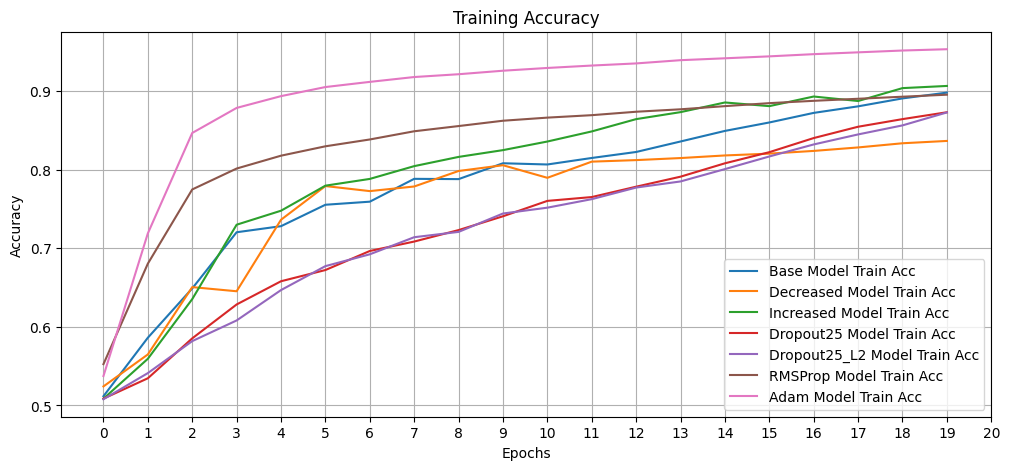

In [50]:
# Plot training and validation accuracy history
plt.figure(figsize=(12, 5))
plt.plot(base_history.history['accuracy'], label='Base Model Train Acc')
plt.plot(model_decreased_history.history['accuracy'], label='Decreased Model Train Acc')
plt.plot(model_increased_history.history['accuracy'], label='Increased Model Train Acc')
plt.plot(model_dropout_history.history['accuracy'], label='Dropout25 Model Train Acc')
plt.plot(model_dropout_l2_history.history['accuracy'], label='Dropout25_L2 Model Train Acc')
plt.plot(model_rmsprop_history.history['accuracy'], label='RMSProp Model Train Acc')
plt.plot(model_adam_history.history['accuracy'], label='Adam Model Train Acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

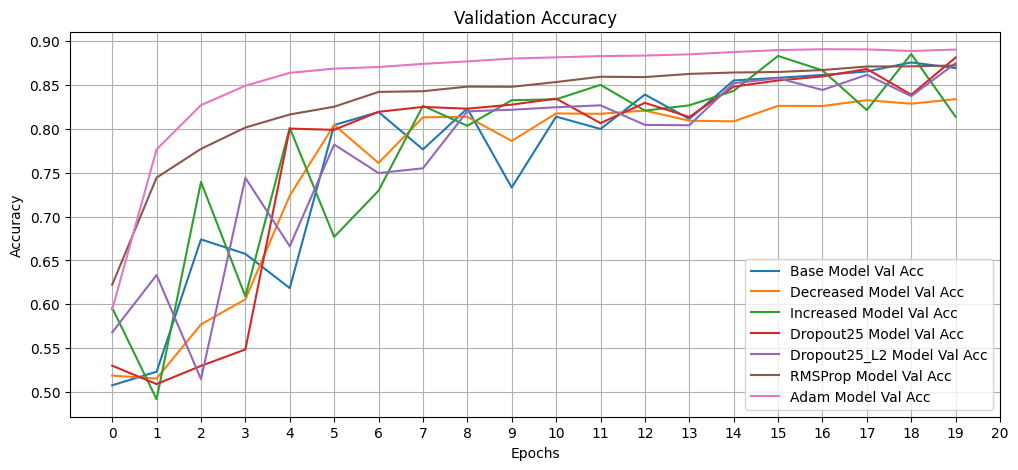

In [51]:
##---------Type the code below this line------------------##

# Plot training and validation accuracy history
plt.figure(figsize=(12, 5))
plt.plot(base_history.history['val_accuracy'], label='Base Model Val Acc')
plt.plot(model_decreased_history.history['val_accuracy'], label='Decreased Model Val Acc')
plt.plot(model_increased_history.history['val_accuracy'], label='Increased Model Val Acc')
plt.plot(model_dropout_history.history['val_accuracy'], label='Dropout25 Model Val Acc')
plt.plot(model_dropout_l2_history.history['val_accuracy'], label='Dropout25_L2 Model Val Acc')
plt.plot(model_rmsprop_history.history['val_accuracy'], label='RMSProp Model Val Acc')
plt.plot(model_adam_history.history['val_accuracy'], label='Adam Model Val Acc')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Force x-axis to show all epoch numbers
plt.xticks(ticks=range(0, 21, 1))  # Show all epochs from 0 to 20
plt.legend()
plt.grid()
plt.show()

Test Accuracies (Before Plotting): {'Base Model': 86.47634983062744, 'Decreased Model': 82.7506959438324, 'Increased Model': 80.98866939544678, 'Dropout25 Model': 86.77875995635986, 'Dropout25_L2 Model': 86.61747574806213, 'RMSProp Model': 86.68198585510254, 'Adam Model': 87.2908353805542}


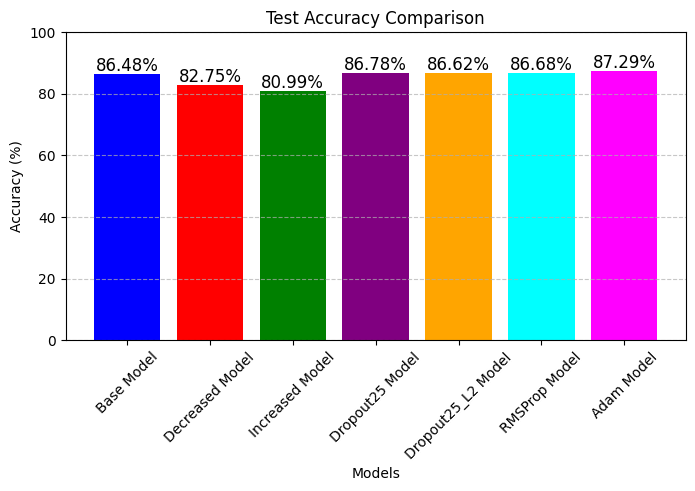

In [52]:
##---------Type the code below this line------------------##

# Ensure test accuracy values are correctly scaled to percentages
test_accuracies = {
    "Base Model": base_test_acc ,
    "Decreased Model": model_decreased_test_acc,
    "Increased Model": model_increased_test_acc,
    "Dropout25 Model": model_dropout_test_acc,
    "Dropout25_L2 Model": model_dropout_l2_test_acc,
    "RMSProp Model": model_rmsprop_test_acc,
    "Adam Model": model_adam_test_acc
}

# Debugging: Print values before plotting
print("Test Accuracies (Before Plotting):", test_accuracies)

# Plot test accuracy as a bar chart
plt.figure(figsize=(8, 4))
plt.bar(test_accuracies.keys(), test_accuracies.values(), 
        color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Ensure correct scaling
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the accuracy values on top of the bars
for i, (model, acc) in enumerate(test_accuracies.items()):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=12)

plt.show()


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck